#### Importamos librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos Data a consumir

In [2]:
hechos = pd.read_parquet('../Datasets/hechos.parquet')
victimas = pd.read_parquet('../Datasets/victimas.parquet')
victimasf = pd.read_parquet('../Datasets/victimasf.parquet')
poblacion = pd.read_parquet('../Datasets/poblacion.parquet')
comunas = pd.read_parquet('../Datasets/comunas.parquet')

In [8]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             667 non-null    int32         
 1   N_VICTIMAS     667 non-null    int8          
 2   FECHA          667 non-null    datetime64[ns]
 3   AAAA           667 non-null    int32         
 4   MM             667 non-null    int8          
 5   DD             667 non-null    int8          
 6   TIPO_DE_CALLE  667 non-null    category      
 7   ID_COMUNA      667 non-null    int8          
 8   pos x          667 non-null    object        
 9   pos y          667 non-null    object        
 10  VICTIMA        667 non-null    category      
 11  ACUSADO        667 non-null    category      
 12  FH             667 non-null    category      
 13  FATAL          667 non-null    int8          
dtypes: category(4), datetime64[ns](1), int32(2), int8(5), object(2)
memory usa

### Variable Cuantitativas:
1   N_VICTIMAS     667 non-null    int8

 13  FATAL          667 non-null    int8

 si bien las columnas de ID, Fecha, AAAA, MM, DD, tambien son cuantitativas, estas son ordinales lo que se utilizan para la ubicación en espacio y tiempo

### variable de georeferencia:

si bien este dato es del tipo numerico nos indica la geolocalización mas que una cantidad a la que hacer referencia

### Variables cualitativas:
 6   TIPO_DE_CALLE  667 non-null    category 
 
 7   ID_COMUNA         667 non-null    int8   
 
 10  VICTIMA        667 non-null    category 
 
 11  ACUSADO        667 non-null    category 
 
 12  FH             667 non-null    category 

#### visualizamos las variable cuantitativas

realizamos graficos de caja para examinar los outliers

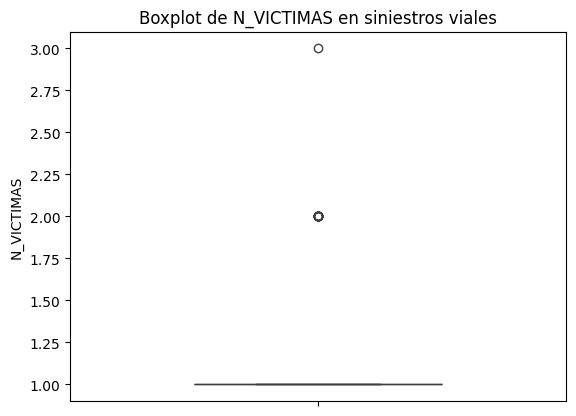

In [29]:
sns.boxplot(data=hechos['N_VICTIMAS'], width=0.5)
plt.title('Boxplot de N_VICTIMAS en siniestros viales')
plt.show()

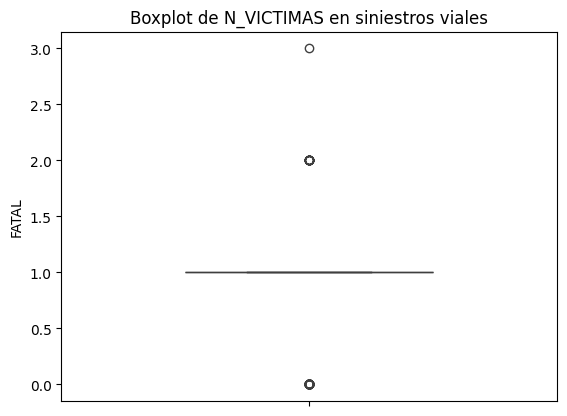

In [30]:
sns.boxplot(data=hechos['FATAL'], width=0.5)
plt.title('Boxplot de N_VICTIMAS en siniestros viales')
plt.show()

notamos que tenemos outliers en de 2 a 3 victimas, tambien en 0 (sobrevivientes)

graficamos histogramas para ver la distribución de los datos

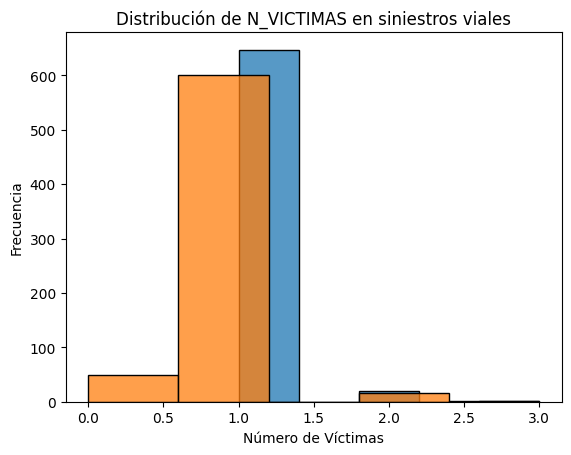

In [24]:
sns.histplot(hechos['N_VICTIMAS'], bins=5)
sns.histplot(hechos['FATAL'], bins=5)
plt.title('Distribución de N_VICTIMAS en siniestros viales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()

aqui vemos que casi el total de los siniestros son fatales, en el histogramas tenemos una gran diferencia en la cantidad entre 1 y 0, 2 y 3 victimas, lo analizaremos mas en detalle utilizando las variable categoricas mas adelante, continuamos con las numericas

graficamos los siniestros ocurridos por año

In [46]:
anios=hechos.groupby('AAAA').count()['ID'].reset_index()

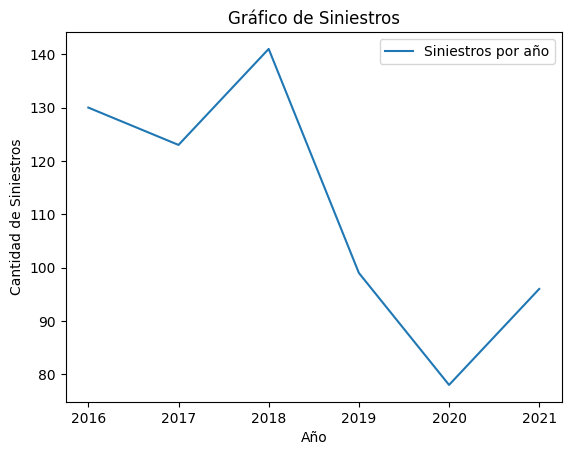

In [47]:
sns.lineplot(x=anios['AAAA'], y=anios['ID'], label='Siniestros por año')
plt.title('Gráfico de Siniestros')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.legend()  
plt.show()

claramente vemos que en el año 2020 registramos la menor cantidad de siniestros, si bien aumento el ultimo año vemos que es bastante reducido comparado años anteriores

El KPI sobre la tasa de homicidios esta definido en los ultimos 6 meses por lo que vamos a analizarlo

agrupamos el dataset con los ultimos semestres

In [8]:
anio21s1 = hechos[(hechos['AAAA']==2021) & (hechos['MM']<7)].groupby('MM')['ID'].count().reset_index()
anio21s2 = hechos[(hechos['AAAA']==2021) & (hechos['MM']>=7)].groupby('MM')['ID'].count().reset_index()

obtenemos la cantidad total de habitantes

In [9]:
pob_total = poblacion['POBLACIÓN TOTAL'].sum()

definimos una funcion para calcular la tasa de homicidios

In [10]:
def tasa_homi(row):
    return round((row['ID']/pob_total)*100000,2)

obtenemos la tasa de homicidios mensual mediante la funcion

In [11]:
anio21s1['TASA'] = anio21s1.apply(tasa_homi, axis=1)
anio21s2['TASA'] = anio21s2.apply(tasa_homi, axis=1)

hacemos arreglos a los meses del segundo semestre para coincidir con el primer semestre y graficar

In [12]:
anio21s2.drop(columns=['MM'], inplace=True)
anio21s2 = anio21s2.reset_index()
anio21s2['index'] = anio21s2['index']+1
anio21s2.rename(columns={'index':'MM'}, inplace=True)

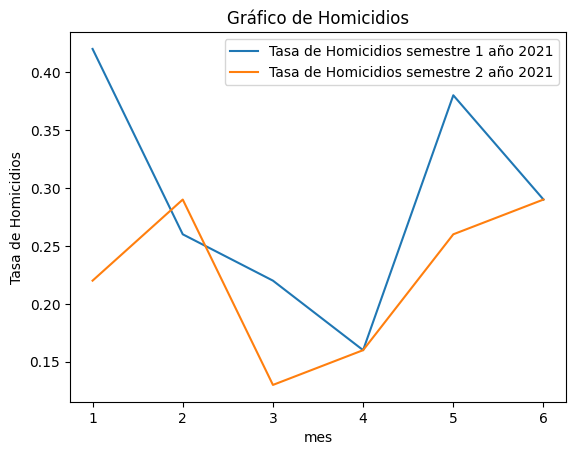

In [13]:
sns.lineplot(x=anio21s1['MM'], y=anio21s1['TASA'], label='Tasa de Homicidios semestre 1 año 2021')
sns.lineplot(x=anio21s2['MM'], y=anio21s2['TASA'], label='Tasa de Homicidios semestre 2 año 2021')
plt.title('Gráfico de Homicidios')
plt.xlabel('mes')
plt.ylabel('Tasa de Homicidios')
plt.legend()  
plt.show()

si bien el pico inferior se encuentran en distintos meses vemos una alza en la segunda mitad de ambos semestres

ahora graficaremos con el KPI propuesto para analizar si se alcanzo el objetivo de reducir la tasa de homicidios un 10% segun el semestre anterior

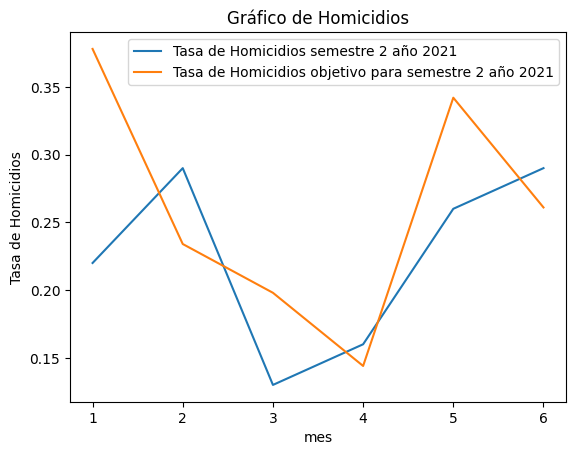

In [91]:
sns.lineplot(x=anio21s2['MM'], y=anio21s2['TASA'], label='Tasa de Homicidios semestre 2 año 2021')
sns.lineplot(x=anio21s1['MM'], y=anio21s1['TASA']*0.9, label='Tasa de Homicidios objetivo para semestre 2 año 2021')
plt.title('Gráfico de Homicidios')
plt.xlabel('mes')
plt.ylabel('Tasa de Homicidios')
plt.legend()  
plt.show()

vemos que si se cumplio con el objetivo en el primer, tercer y quinto mes del segundo semestre

ahora veremos el total del semestre en comparacion con el objetivo

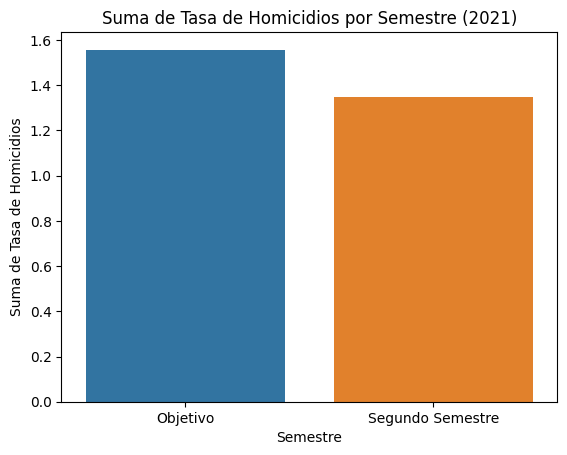

In [100]:
suma_tasa_s1 = anio21s1['TASA'].sum()*0.9
suma_tasa_s2 = anio21s2['TASA'].sum()
sns.barplot(x=['Objetivo', 'Segundo Semestre'], y=[suma_tasa_s1, suma_tasa_s2], hue=['Objetivo', 'Segundo Semestre'], legend=False)
plt.title('Suma de Tasa de Homicidios por Semestre (2021)')
plt.xlabel('Semestre')
plt.ylabel('Suma de Tasa de Homicidios')
plt.show()

analizando el total de la tasa de homicidios del semestre vemos que se logro el objetivo

### pasaremos a analizar las variables categoricas

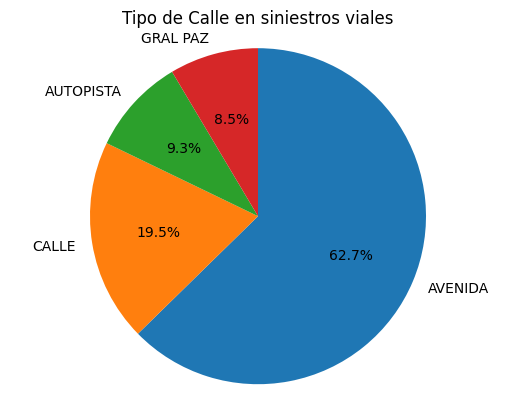

In [101]:
conteo_tipos_calle = hechos['TIPO_DE_CALLE'].value_counts()
plt.pie(conteo_tipos_calle, labels=conteo_tipos_calle.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Tipo de Calle en siniestros viales')
plt.axis('equal')  # Esto asegura que el gráfico de torta sea un círculo
plt.show()

en un mayor porcentaje los siniestros ocurren en el tipo de calle Avenida, debido a la poca cantidad de intersecciones y la prioridad de este tipo de calles es mayor la velocidad de los vehiculos por lo que es un factor de riesgo a tener en cuenta

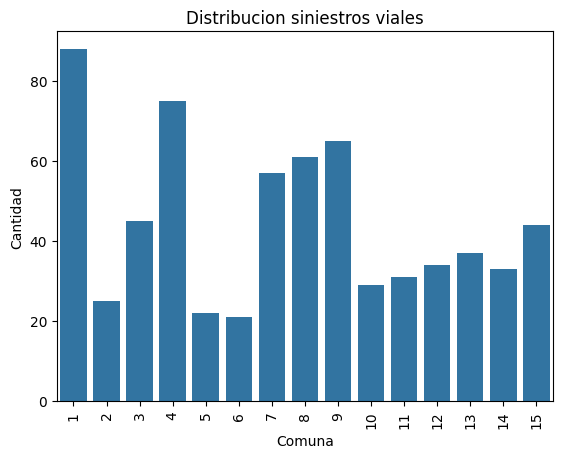

In [113]:
sns.countplot(x='ID_COMUNA', data=hechos)
plt.title('Distribucion siniestros viales')
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.show()

In [128]:
with pd.option_context('display.max_colwidth', None):
  display(comunas[(comunas['ID_COMUNA'] == 1) | (comunas['ID_COMUNA'] == 4)])

,ID_COMUNA,COMUNA
0,1,"Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución."
3,4,"La Boca, Barracas, Parque Patricios y Nueva Pompeya"


en las comunas:

- 1 Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.

- 4 La Boca, Barracas, Parque Patricios y Nueva Pompeya

se concentra la mayor cantidad de siniestros

In [129]:
pd.reset_option('display.max_rows')

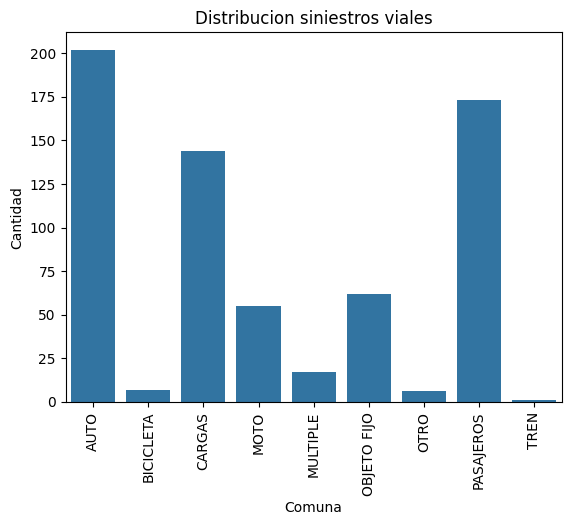

In [115]:
sns.countplot(x='ACUSADO', data=hechos)
plt.xticks(rotation=90)
plt.title('Distribucion siniestros viales')
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.show()

el causal de los siniestros son en su mayoria por los autos y peatones

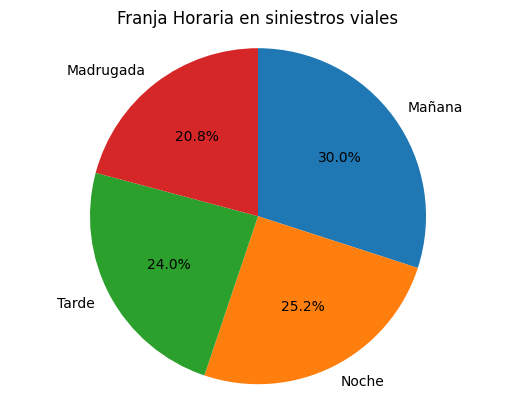

In [117]:
conteo_tipos_calle = hechos['FH'].value_counts()
plt.pie(conteo_tipos_calle, labels=conteo_tipos_calle.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Franja Horaria en siniestros viales')
plt.axis('equal')  # Esto asegura que el gráfico de torta sea un círculo
plt.show()

no encontramos una gran tendencia en el horario de los siniestros

### analizaremos el KPI Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año

In [130]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             667 non-null    int32         
 1   N_VICTIMAS     667 non-null    int8          
 2   FECHA          667 non-null    datetime64[ns]
 3   AAAA           667 non-null    int32         
 4   MM             667 non-null    int8          
 5   DD             667 non-null    int8          
 6   TIPO_DE_CALLE  667 non-null    category      
 7   ID_COMUNA      667 non-null    int8          
 8   pos x          667 non-null    object        
 9   pos y          667 non-null    object        
 10  VICTIMA        667 non-null    category      
 11  ACUSADO        667 non-null    category      
 12  FH             667 non-null    category      
 13  FATAL          667 non-null    int8          
dtypes: category(4), datetime64[ns](1), int32(2), int8(5), object(2)
memory usa

In [16]:
anio20 = hechos[(hechos['AAAA']==2020) & (hechos['VICTIMA']=='MOTO')].groupby('MM')['ID'].count().reset_index()
anio21 = hechos[(hechos['AAAA']==2021) & (hechos['VICTIMA']=='MOTO')].groupby('MM')['ID'].count().reset_index()

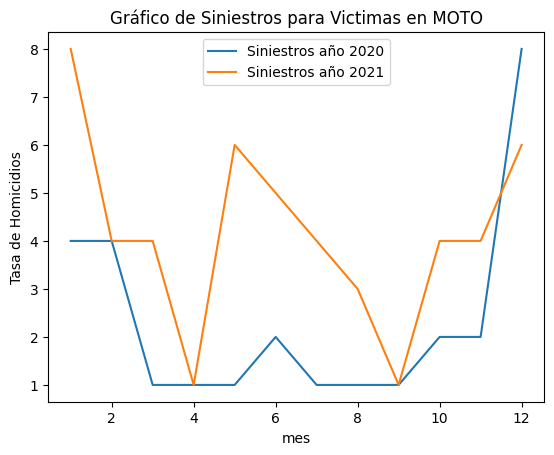

In [17]:
sns.lineplot(x=anio20['MM'], y=anio20['ID'], label='Siniestros año 2020')
sns.lineplot(x=anio21['MM'], y=anio21['ID'], label='Siniestros año 2021')
plt.title('Gráfico de Siniestros para Victimas en MOTO')
plt.xlabel('mes')
plt.ylabel('Tasa de Homicidios')
plt.legend()  
plt.show()

vemos que en el año 2021 en todo el año exceptuando diciembre tenemos una mayor cantidad de siniestros donde la VICTIMA es MOTO

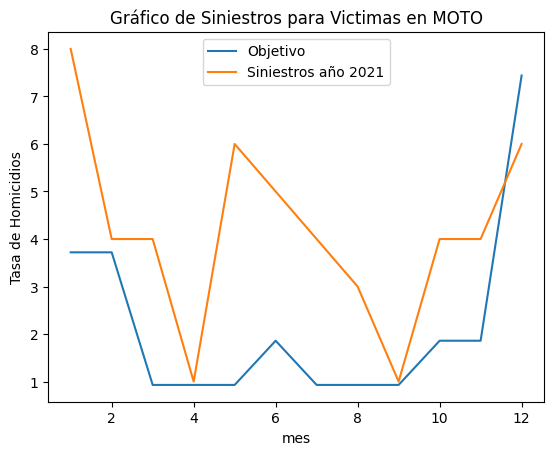

In [18]:
sns.lineplot(x=anio20['MM'], y=anio20['ID']*0.93, label='Objetivo')
sns.lineplot(x=anio21['MM'], y=anio21['ID'], label='Siniestros año 2021')
plt.title('Gráfico de Siniestros para Victimas en MOTO')
plt.xlabel('mes')
plt.ylabel('Tasa de Homicidios')
plt.legend()  
plt.show()

claramente estamos por encima del objetivo por lo que tendremos que adoptar medidas para reducir este numero, los factores de riesgo en MOTO son las medidas de seguridad como el uso de casco o la calidad del casco y una velocidad prudencial